In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cma='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [5]:
sep_coins = cv2.imread('DATA/pennies.jpg')

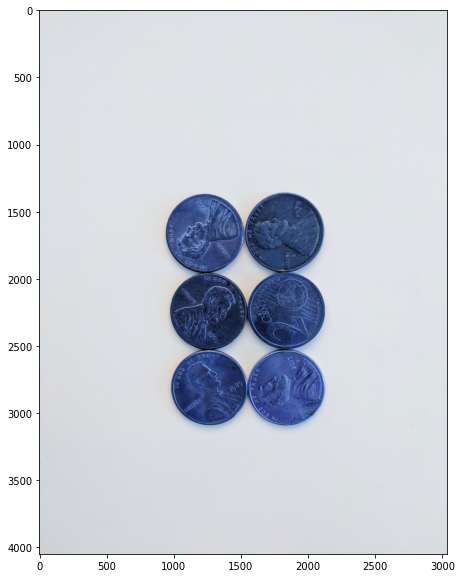

In [6]:
display(sep_coins)

In [8]:
# Median Blur
# Grayscale
# Binary Threshold
# Find Contours

In [9]:
sep_blur = cv2.medianBlur(sep_coins,25)

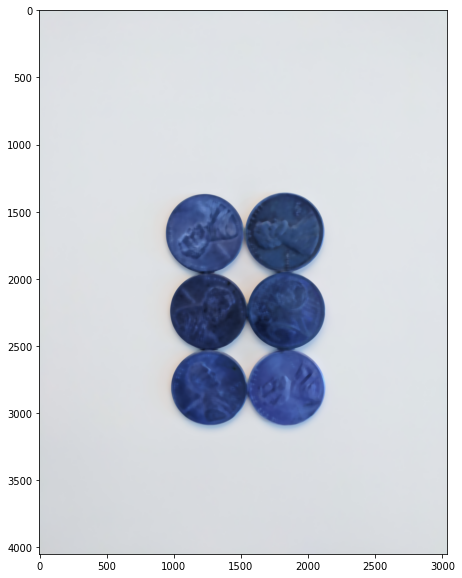

In [10]:
display(sep_blur)

In [13]:
gray_sep_coins = cv2.cvtColor(sep_blur,cv2.COLOR_BGR2GRAY)

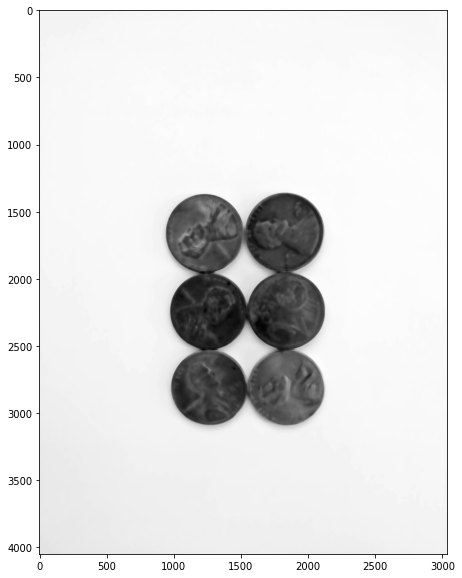

In [14]:
display(gray_sep_coins)

In [19]:
ret, sep_thresh = cv2.threshold(gray_sep_coins,160,255,cv2.THRESH_BINARY_INV)

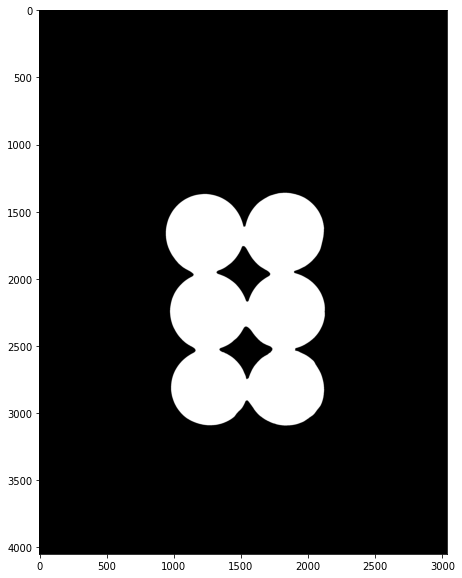

In [20]:
display(sep_thresh)

In [23]:
contours,hierarchy = cv2.findContours(sep_thresh.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

In [24]:
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

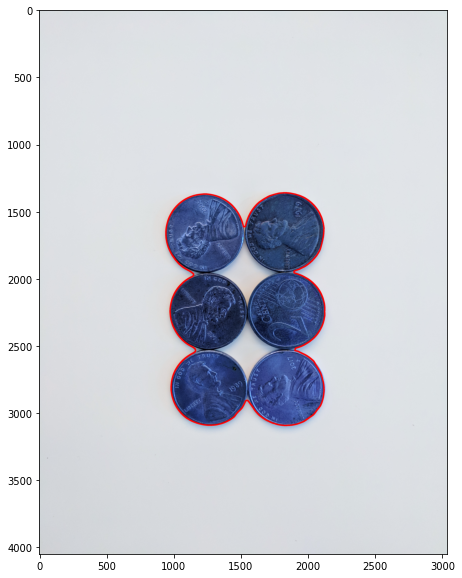

In [25]:
display(sep_coins)

In [26]:
img = cv2.imread('DATA/pennies.jpg')

In [27]:
img = cv2.medianBlur(img,35)

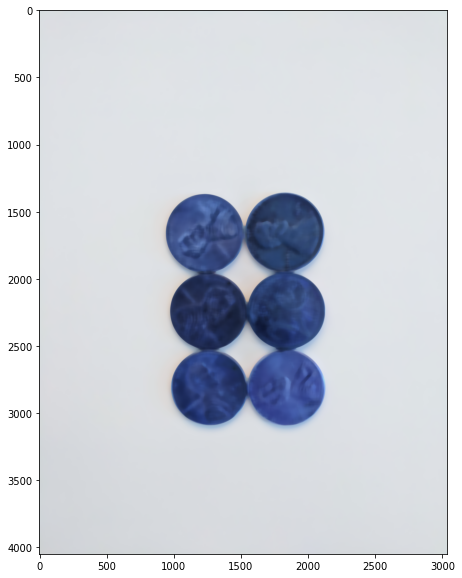

In [28]:
display(img)

In [29]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [34]:
ret,thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

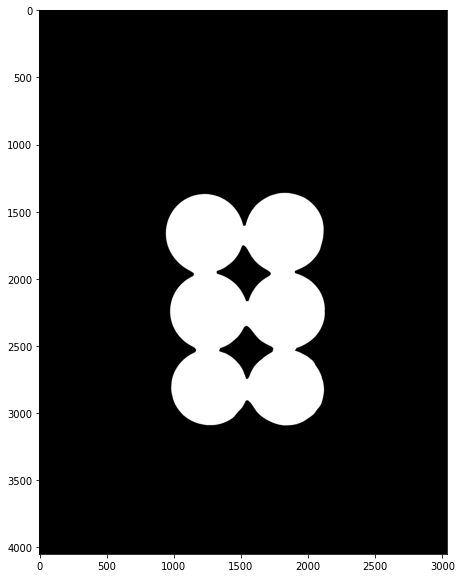

In [35]:
display(thresh)

In [52]:
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# NOISE REMOVAL (OPTIONAL)

In [53]:
kernel = np.ones((3,3),np.uint8)

In [54]:
kernel

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]], dtype=uint8)

In [55]:
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations=2)

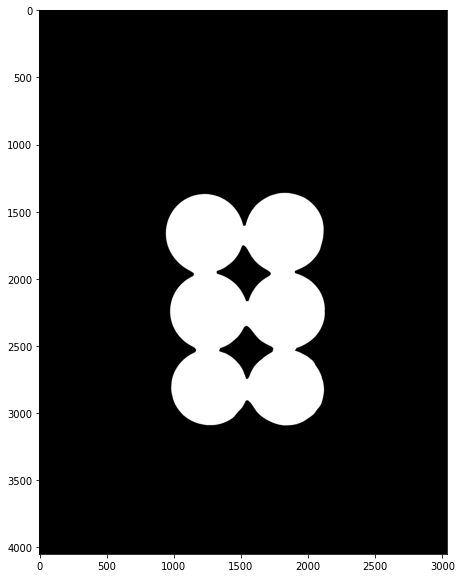

In [56]:
display(opening)

In [57]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

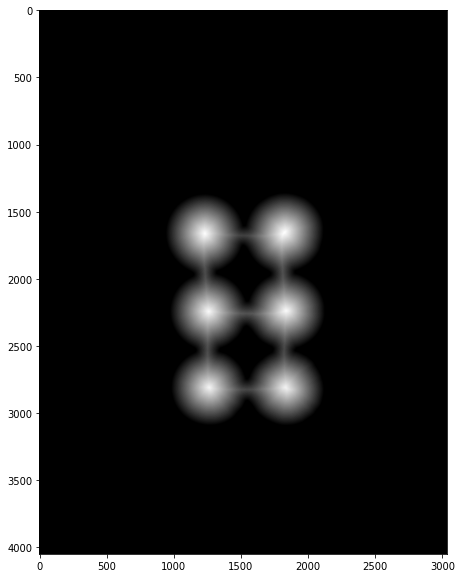

In [58]:
display(dist_transform)

In [59]:
ret,sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

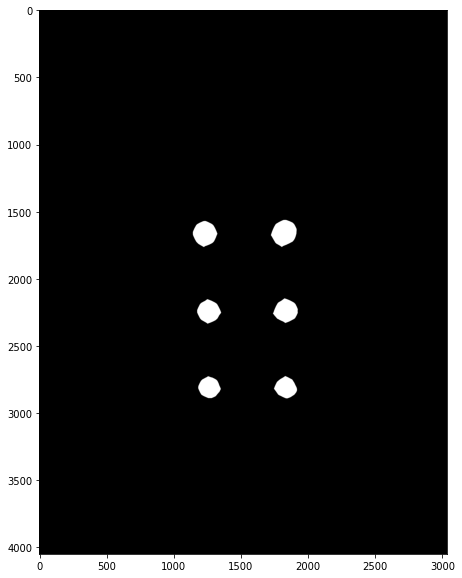

In [60]:
display(sure_fg)

In [61]:
sure_fg = np.uint8(sure_fg)

In [62]:
unknown = cv2.subtract(sure_bg,sure_fg)

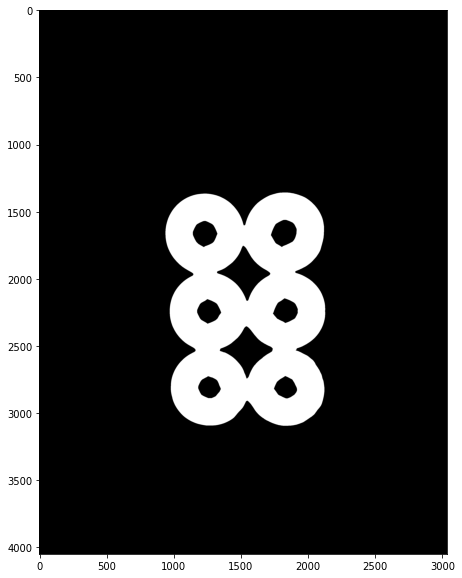

In [63]:
display(unknown)

In [68]:
ret,markers = cv2.connectedComponents(sure_fg)

In [69]:
markers = markers +1

In [71]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

In [72]:
markers[unknown==255] = 0

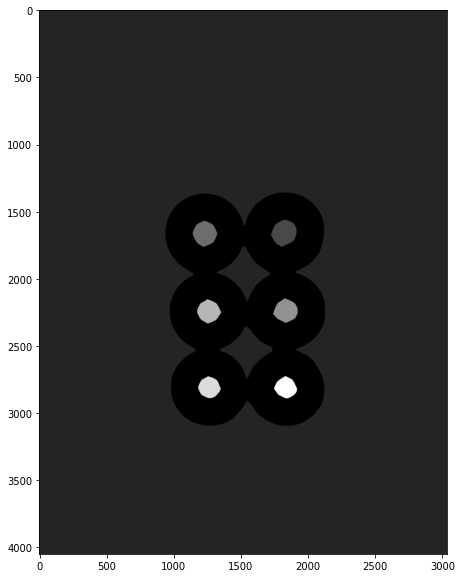

In [73]:
display(markers)

In [74]:
markers = cv2.watershed(img,markers)

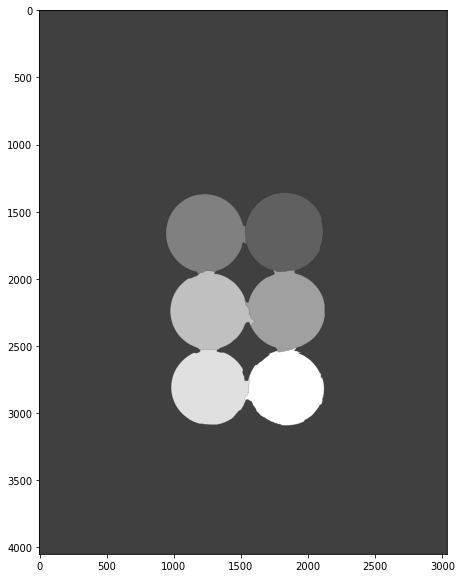

In [75]:
display(markers)

In [76]:
contours,hierarchy = cv2.findContours(markers.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(sep_coins,contours,i,(255,0,0),10)

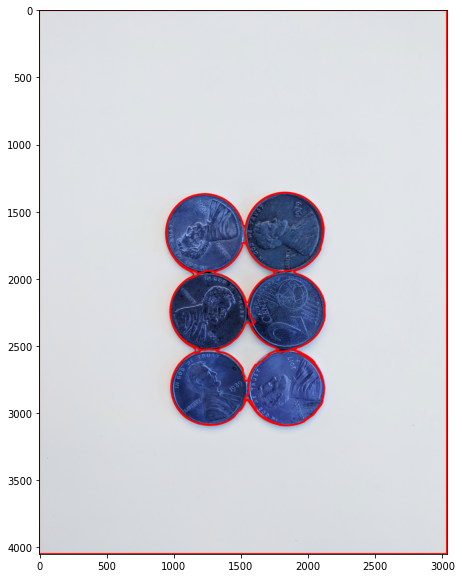

In [77]:
display(sep_coins)